In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, datasets
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

In [166]:
x_train.shape

(60000, 28, 28)

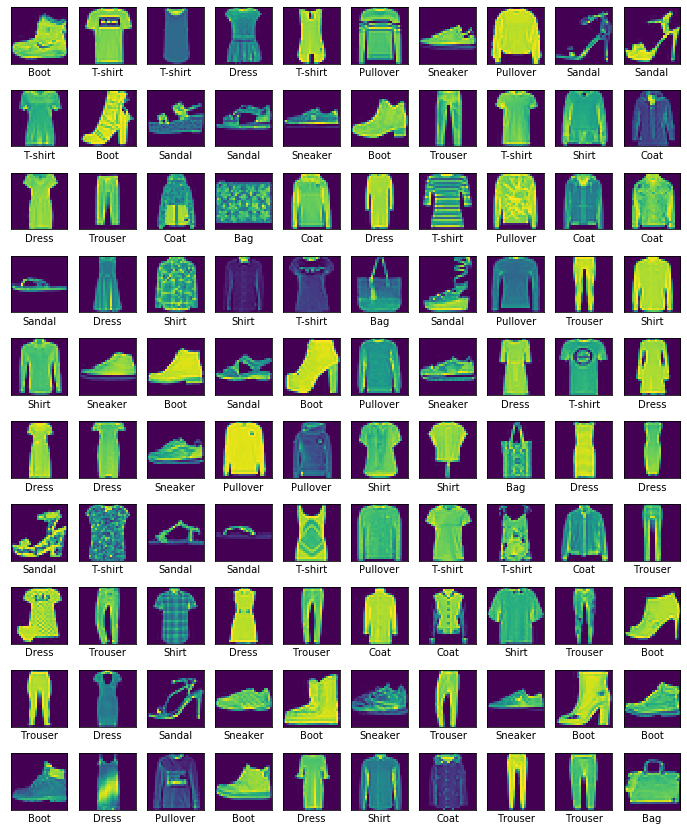

In [167]:
plt.figure(figsize=(12,15))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i]])
plt.show()

In [0]:
scaler = MinMaxScaler()
pl_x = Pipeline([
    ('reshape_normalize', scaler),
])
onehot = OneHotEncoder()
pl_y = Pipeline([
    ('one-hot', onehot),
])

x_train_featured = pl_x.fit(x_train.reshape(-1,28*28)).transform(x_train.reshape(-1,28*28)).reshape(-1,28,28)
x_test_featured = pl_x.fit(x_test.reshape(-1,28*28)).transform(x_test.reshape(-1,28*28)).reshape(-1,28,28)
y_train_featured = pl_y.fit_transform(y_train.astype(np.int32).reshape(-1,1)).toarray()
y_test_featured= pl_y.fit_transform(y_test.astype(np.int32).reshape(-1,1)).toarray()


In [169]:
y_train.astype(np.int32)

array([9, 0, 0, ..., 3, 0, 5], dtype=int32)

In [0]:
from tensorflow.keras import Sequential, optimizers
LeNet = Sequential([
    layers.Conv2D(6,kernel_size=3,strides=1),
    layers.MaxPooling2D(pool_size=2,strides=2),
    layers.ReLU(),
    layers.Conv2D(16,kernel_size=3,strides=1),
    layers.MaxPooling2D(pool_size=2,strides=2),
    layers.ReLU(),
    layers.Flatten(),

    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10)])

In [171]:
LeNet.build((None, 28, 28,1))
LeNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  60        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
re_lu_6 (ReLU)               multiple                  0         
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  880       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 multiple                  0         
_________________________________________________________________
re_lu_7 (ReLU)               multiple                  0         
_________________________________________________________________
flatten_3 (Flatten)          multiple                 

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
batchsz = 512
train_db = tf.data.Dataset.from_tensor_slices((x_train_featured, y_train_featured))
train_db = train_db.batch(batchsz)
test_db = tf.data.Dataset.from_tensor_slices((x_test_featured, y_test_featured)).batch(batchsz)

In [173]:
#Using softmax
loss_func = losses.CategoricalCrossentropy(from_logits=True)
for i in range(20):
  step=0
  for (x,y) in train_db:
    with tf.GradientTape() as tape:
      out = LeNet(tf.expand_dims(x,axis=-1))
      loss = loss_func(y, out)
    grads = tape.gradient(loss, LeNet.trainable_variables)
    optimizer.apply_gradients(zip(grads, LeNet.trainable_variables))
    if(step%80==0):
      correct, total = 0,0
      for x,y in test_db: 
        x = tf.expand_dims(x,axis=-1)
        out = LeNet(x)
        pred = tf.argmax(out, axis=-1)  
        y = tf.argmax(y, axis=1)
        correct += float(tf.reduce_sum(tf.cast(tf.equal(pred, y),tf.float32)))
        total += x.shape[0]
      print('loss:', loss.numpy())
      print('test acc:', correct/total)
    step+=1


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

loss: 2.305678
test acc: 0.0999
loss: 0.63774085
test acc: 0.7527
loss: 0.6231801
test acc: 0.7534
loss: 0.50787574
test acc: 0.8018
loss: 0.47927928
test acc: 0.8065
loss: 0.4544484
test acc: 0.8195
loss: 0.4148382
test acc: 0.8314
loss: 0.4223234
test acc: 0.835
loss: 0.37696642
test acc: 0.8428
loss: 0.39653683
test acc: 0.8489
loss: 0.35163987
test acc: 0.8485
loss: 0.37163335
test acc: 0.8539
loss: 0.33173126
test acc: 0.8544
loss: 0.35271156
test acc: 0.8597
loss: 0.3157863
test acc: 0.8604
loss: 